In [11]:
%load_ext autoreload
%autoreload 2

import sys
import os

# https://stackoverflow.com/a/35273613 -> for how to import a local file in a notebook
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utilities.data_handling.pandas_reading import read_csv_file_with_pandas
from utilities.plotting.plot_customizer import PlotCustomizer

import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
jlab_pandas_df = read_csv_file_with_pandas('../data/jlab_kinematics.csv')

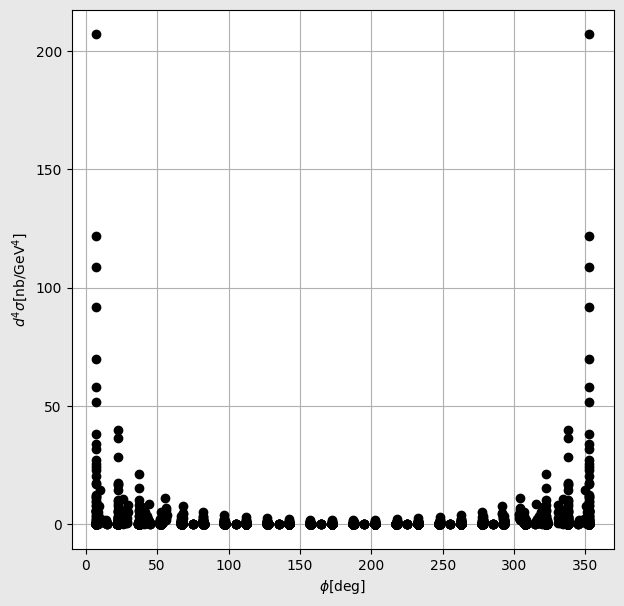

In [54]:
_FIGURE_X_AXIS_WIDTH_IN_INCHES = 7.
_FIGURE_Y_AXIS_HEIGHT_IN_INCHES = 7.
_FIGURE_DOTS_PIXELS_PER_INCH = 100.0
FIGURE_DIMENSION = (1 * _FIGURE_X_AXIS_WIDTH_IN_INCHES, _FIGURE_Y_AXIS_HEIGHT_IN_INCHES)

# (1): Figure instance:
figure = plt.figure(
    figsize = FIGURE_DIMENSION,
    dpi = _FIGURE_DOTS_PIXELS_PER_INCH,
    facecolor = "#e8e8e8"
)

# (2): Add an Axes Object:
axes_object = figure.add_subplot(111)

# (3): Obtain the data:
values_of_x_B = jlab_pandas_df['x_b']
values_of_Q_squared = jlab_pandas_df['QQ']
values_of_t = jlab_pandas_df['t']
cross_sections = jlab_pandas_df['F']
cross_section_errors = jlab_pandas_df["sigmaF"]
azimuthal_angle = jlab_pandas_df['phi_x']

# (4): Customize the Axes Object:
customizer = PlotCustomizer(
    axes_object,
    title = '',
    xlabel = r"$\phi [\text{deg}]$",
    ylabel = r"$d^{4} \sigma [\text{nb}/\text{GeV}^{{4}}]$",
    grid = True)

# (5): Add data to the Axes Object:
customizer.add_errorbar_plot(
    azimuthal_angle,
    cross_sections,
    cross_section_errors,
    np.zeros(len(cross_section_errors)),
    color = 'black')

That's all the data without any kind of binning procedure. We need to implement the binning procedure. As a brief example, just choose some random slice of the DF:

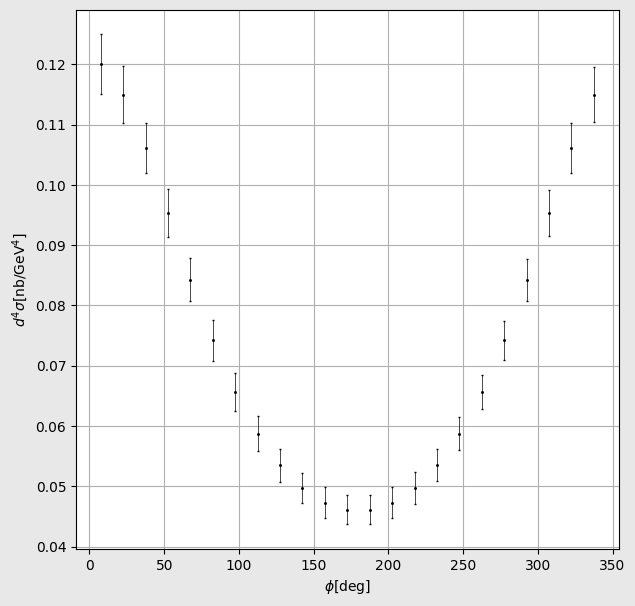

In [59]:
_FIGURE_X_AXIS_WIDTH_IN_INCHES = 7.
_FIGURE_Y_AXIS_HEIGHT_IN_INCHES = 7.
_FIGURE_DOTS_PIXELS_PER_INCH = 100.0
FIGURE_DIMENSION = (1 * _FIGURE_X_AXIS_WIDTH_IN_INCHES, _FIGURE_Y_AXIS_HEIGHT_IN_INCHES)

# (1): Figure instance:
figure = plt.figure(
    figsize = FIGURE_DIMENSION,
    dpi = _FIGURE_DOTS_PIXELS_PER_INCH,
    facecolor = "#e8e8e8"
)

# (2): Add an Axes Object:
axes_object = figure.add_subplot(111)

# (3): Obtain the data:
values_of_x_B = jlab_pandas_df['x_b']
values_of_Q_squared = jlab_pandas_df['QQ']
values_of_t = jlab_pandas_df['t']
cross_sections = jlab_pandas_df['F'][0:23]
cross_section_errors = jlab_pandas_df["sigmaF"][0:23]
azimuthal_angle = jlab_pandas_df['phi_x'][0:23]

# (4): Customize the Axes Object:
customizer = PlotCustomizer(
    axes_object,
    title = '',
    xlabel = r"$\phi [\text{deg}]$",
    ylabel = r"$d^{4} \sigma [\text{nb}/\text{GeV}^{{4}}]$",
    grid = True)

# (5): Add data to the Axes Object:
customizer.add_errorbar_plot(
    azimuthal_angle,
    cross_sections,
    cross_section_errors,
    np.zeros(len(cross_section_errors)),
    color = 'black')